<a href="https://colab.research.google.com/github/HagarIbrahiem/Learning_purposes/blob/main/Taitanic_Outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Different types of outliers**

One must distinguish between univariate and multivariate outliers. Univariate outliers are extreme values in the distribution of a specific variable, whereas multivariate outliers are a combination of values in an observation that is unlikely. For example, a univariate outlier could be a human age measurement of 120 years or a temperature measurement in Antarctica of 50 degrees Celsius.

A multivariate outlier could be an observation of a human with a height measurement of 2 meters (in the 95th percentile) and a weight measurement of 50kg (in the 5th percentile). Both types of outliers can affect the outcome of an analysis but are detected and treated differently.

This notebook is going to cover the Univariate outliers:
- Visualize outliers
- Detect outliers
- Handle outliers




#**Univariate Outliers**

In [257]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot


In [225]:
df = pd.read_csv('train.csv')
print(df.columns)
df.head()


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## First : Visualize Outliers

A first and useful step in detecting univariate outliers is the visualization of a variables’ distribution. Typically, when conducting an EDA, this needs to be done for all interesting variables of a data set individually.

To receive a quick overview of all variables’ distributions, you can use a group plot. Be aware that variables can differ in scale, and adding all variables into one grid may lead to some hard to read charts. You can run df.describe() first to get an idea of each variable’s scale and then created three group plots for three different variable groups. Here is an example of medium scaled variables:

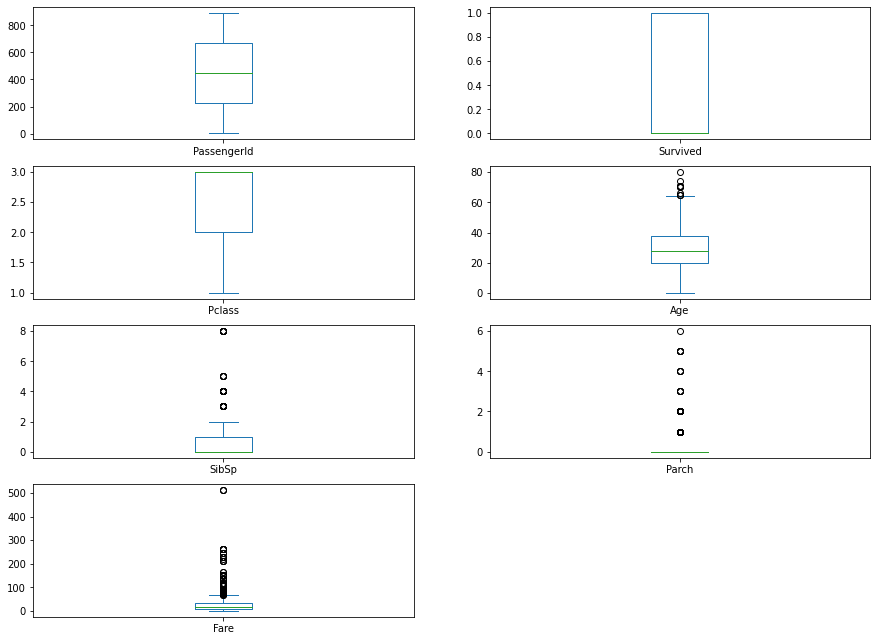

In [226]:
## boxplot all features in dataset
df.plot(kind="box",subplots=True,layout=(7,2),figsize=(15,20));

In [227]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


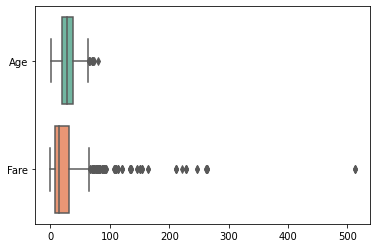

In [228]:
## seems like Age and Fare has unexpected mean and std
df_1 = df[['Age', 'Fare']]
ax = sns.boxplot(data=df_1, orient="h", palette="Set2")

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


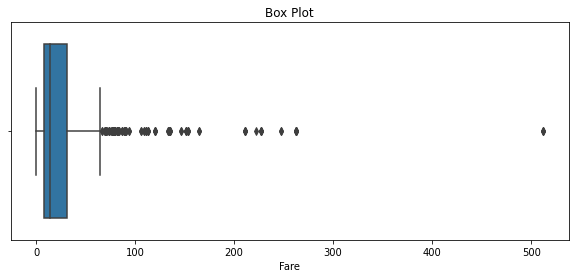

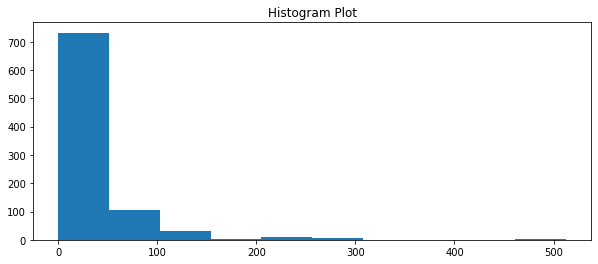

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


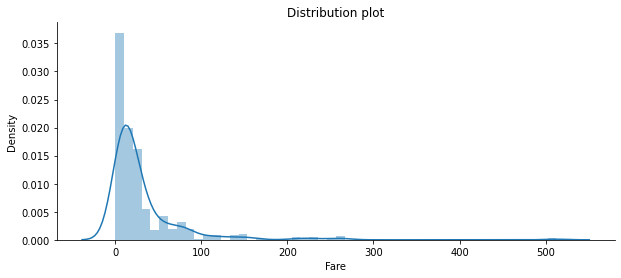

<Figure size 720x288 with 0 Axes>

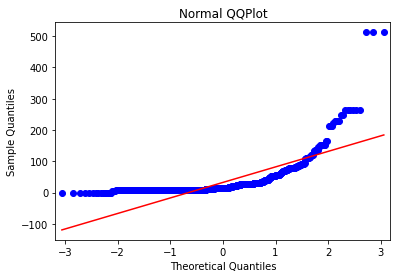

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


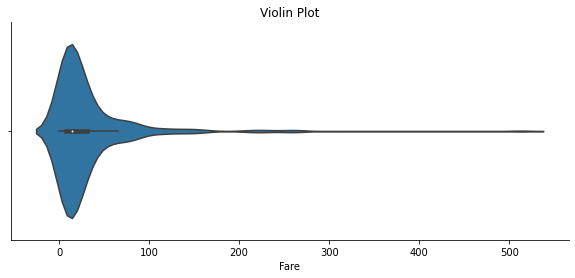

In [229]:
## using different visulaization tools
def Box_plots(df):
    plt.figure(figsize=(10, 4))
    plt.title("Box Plot")
    sns.boxplot(df)
    plt.show()
Box_plots(df['Fare'])

def hist_plots(df):
    plt.figure(figsize=(10, 4))
    plt.hist(df)
    plt.title("Histogram Plot")
    plt.show()
hist_plots(df['Fare'])

def dist_plots(df):
    plt.figure(figsize=(10, 4))
    sns.distplot(df)
    plt.title("Distribution plot")
    sns.despine()
    plt.show()
dist_plots(df['Fare'])

def qq_plots(df):
    plt.figure(figsize=(10, 4))
    qqplot(df,line='s')
    plt.title("Normal QQPlot")
    plt.show()
qq_plots(df['Fare'])

def violin_plots(df):
    plt.figure(figsize=(10, 4))
    sns.violinplot(df)
    plt.title("Violin Plot")
    sns.despine()
    plt.show()
violin_plots(df['Fare'])

Box plots are great to summarize and visualize the distribution of variables easily and quickly. However, they do not identify the actual indexes of the outlying observations. 

To decide on the right approach for your own data set, closely examine your variables’ distribution, and use your domain knowledge.

In the following, we will discuss some quantitative methods commonly used in statistics for the detection of univariate outliers.

## Second: Detect Outliers

Outliers can be discovered in various ways, including statistical methods, proximity-based methods, or supervised outlier detection

**IQR vs ZScore**

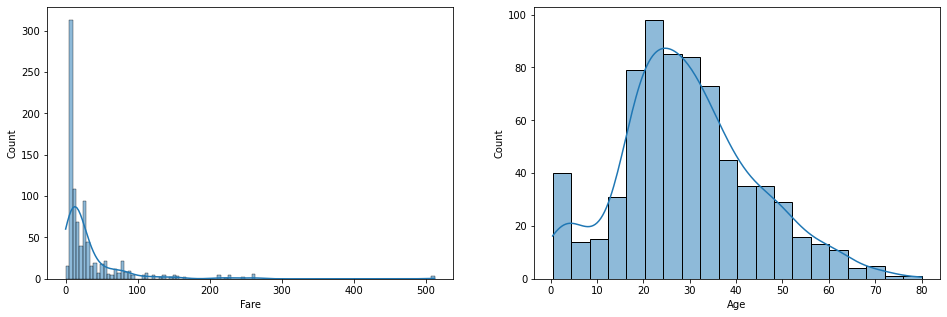

In [230]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
sns.histplot(df['Fare'], kde=True)

plt.subplot(1,2,2)
sns.histplot(df['Age'], kde=True)

plt.show()



From the graph, we can see that Age is almost the right fit for the normal distribution, or we can say it is almost forming the bell curve. Meanwhile, the other one is slightly skewed towards the right. Hence, we are gonna take Age for our further analysis.




We were lucky enough to spot the difference between a normal distribution and skewed distribution from the above graph, but sometimes, the graph might not give a clear understanding that we have the skew function from pandas which will give a higher positive value if the distribution seems to be skewed (Fare) otherwise it will return the quite lower value even in negative if it is not skewed at all (Age).



In [231]:
print(df['Fare'].skew())
print(df['Age'].skew())
# https://www.analyticsvidhya.com/blog/2022/08/dealing-with-outliers-using-the-z-score-method/

4.787316519674893
0.38910778230082704


**1- Using Tukey’s box plot/IQR method**

We will use the Interquartile Range to measure the limits of Outliers if:

- Data doesn’t follow a Normal Distribution or 
- Data is either right-skewed or left-skewed.

To find outliers, we can simply plot the box plot. Outliers are points that are outside of the minimum and maximum values, as seen in the image below.

The great advantage of Tukey’s box plot/IQR method is to find one outlier is **independent** of all other outliers.  

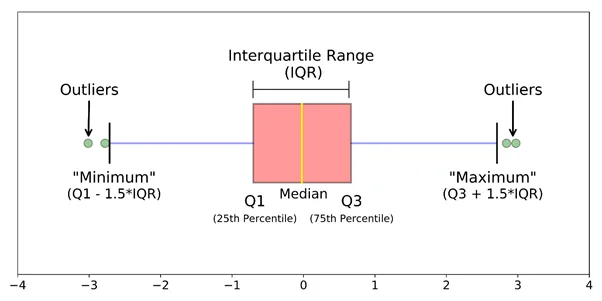

In [232]:
def extract_outliers_using_IQR (df, feature):

  Q1= df[feature].quantile(0.25)
  Q3= df[feature].quantile(0.75)

  IQR = Q3 - Q1

  Minimum_Boundry = Q1-(1.5*IQR)
  Maximum_Boundry = Q3+(1.5*IQR)

  Outliers= df[ (df[feature] <= Minimum_Boundry ) | (df[feature] >= Maximum_Boundry) ]
  print('No. of Ouliers of ', feature , len(Outliers))
  return Outliers


Outliers = extract_outliers_using_IQR (df,'Fare')
# Outliers.head()
Outliers = extract_outliers_using_IQR (df,'Age')
# Outliers.head()

No. of Ouliers of  Fare 116
No. of Ouliers of  Age 11


**2- Z scores**

This method assumes that the variable has a Gaussian/Normal distribution. It represents the number of standard deviations an observation is away from the mean.

Z-Score only works with:

- Data which is completely or close to normally distributed

this method is highly limited as the distributions mean and standard deviation are sensitive to outliers. This means that finding one outlier is **dependent** on other outliers as every observation directly affects the mean.

**P.S.** all the data points 3 or -3 standard deviations away from the mean are outliers.

Following a common rule,  if zscore > C, where C is usually set to 3, the observation is marked as an outlier. This rule stems from the fact that if a variable is normally distributed, 99.7% of all data points are located 3 standard deviations around the mean.







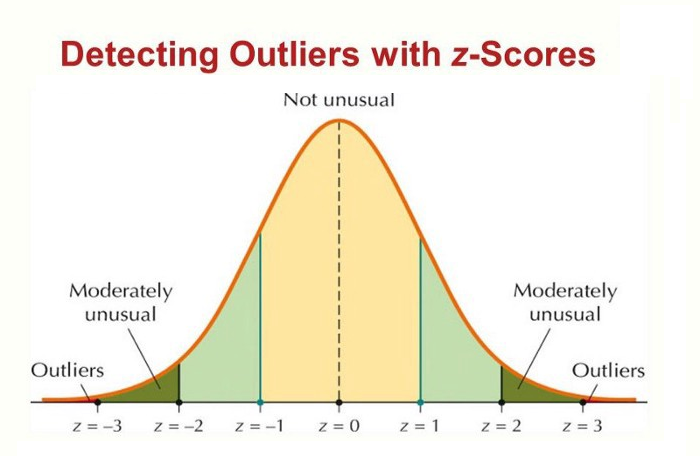



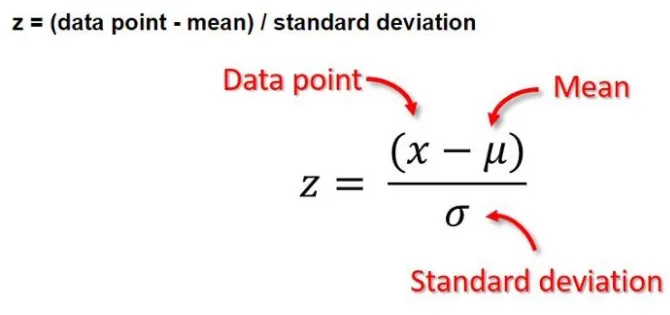

In [254]:
from scipy import stats

def detect_outliers_using_zscore (df, feature):

  ##using hard coding

  # mean = np.mean(df[feature])
  # std = np.std(df[feature])
  # df['zscore'] = (df[feature] - mean)/std
  # # df = df[(df.zscore>-3) & (df.zscore<3)]   #remove
  # return df[(df.zscore<-3) & (df.zscore>3)]


  ##using scipy Library
  zscore_for_all_datapoints =np.abs(stats.zscore(df[feature]))
  threshold=3
  df=df[(zscore_for_all_datapoints> 3)]
  print('No. Outliers of ', feature ,len(df))
  return df

df_zscore = df.copy()
df_zscore = detect_outliers_using_zscore(df_zscore, 'Fare')
# df_zscore.head()

df_zscore = detect_outliers_using_zscore(df_zscore, 'Age') #??? suppose to be outliers in Age
# df_zscore.head()

No. Outliers of  Fare 20
No. Outliers of  Age 0


**3 - Mean and STD**

The very first step in this technique will be setting the upper and lower limit. This range stimulates that every data point will be regarded as an outlier out of this range. Let’s see the formulae for both upper and lower limits.

- Upper: Mean + 3 * standard deviation.
- Lower: Mean – 3 * standard deviation.

In [255]:
def extract_outliers_using_MeanandSTD (df, feature):

  mean=df[feature].mean()
  std= df[feature].std()

  upper_limit = mean + 3*std
  lower_limit = mean - 3*std

  Outliers= df[ (df[feature] < lower_limit ) | (df[feature] > upper_limit) ]
  print('No. of Ouliers =',len(Outliers))
  return Outliers


Outliers = extract_outliers_using_MeanandSTD (df,'Fare')
# Outliers.head()
Outliers = extract_outliers_using_MeanandSTD (df,'Age')
# Outliers.head()


No. of Ouliers = 20
No. of Ouliers = 2


**4- Isolation Forest**

In [256]:
from sklearn.ensemble import IsolationForest

features = [ 'Fare']

## We'll do a simple drop null for now
df_IF = df.copy()
df_IF = df_IF.dropna()

## Create a training-test set
X = df_IF[features]

## Fit Model
clf = IsolationForest(n_estimators=50)
clf.fit(X)

## Get Scores
df_IF['scores'] = clf.decision_function(X)
df_IF['anomaly'] = clf.predict(X)

## Get Anomalies
outliers=df_IF.loc[df_IF['anomaly']==-1]

# outliers

## Handling Outliers

**1- Keep Outliers**

Keeping outliers is a good decision if the outliers rightfully belong to the distribution of interest.

However, in the case where you are not able to easily identify whether or not an extreme value is a part of the population of interest or not, be aware that keeping them will most likely distort the results of your actual task: e.g. leading to a rejection of the null hypothesis or an under/over-optimistic prediction.


**2- Remove Outliers**

This is a very intuitive and straightforward strategy. Removing outliers are efficient if outliers corrupt the estimation of the distribution parameters.

When you decide to remove outliers, document the excluded data points and explain your reasoning. You must be able to attribute a specific cause for removing outliers.

Another approach is to perform the analysis with and without these observations and discuss the differences. Comparing results in this manner is particularly useful when you’re unsure about removing an outlier.



In [236]:
## removing outliers
def drop_outliers_IQR(df , feature):

  Q1= df[feature].quantile(0.25)
  Q3= df[feature].quantile(0.75)

  IQR = Q3 - Q1

  Minimum_Boundry = Q1-(1.5*IQR)
  Maximum_Boundry = Q3+(1.5*IQR)
  
  print("Old Shape: ", df.shape)
  
  # Upper bound
  upper = np.where(df[feature] >= Maximum_Boundry)
  # Lower bound
  lower = np.where(df[feature] <= Minimum_Boundry)
  
  ''' Removing the Outliers '''
  df.drop(upper[0], inplace = True)
  df.drop(lower[0], inplace = True)
  
  print("New Shape: ", df.shape)

df_drop_outliers= df.copy()
drop_outliers_IQR(df_drop_outliers , 'Fare')


Old Shape:  (891, 12)
New Shape:  (775, 12)


In [237]:
def drop_outliers_using_MeanandSTD (df, feature):

  mean=df[feature].mean()
  std= df[feature].std()

  upper_limit = mean + 3*std
  lower_limit = mean - 3*std

  Outliers= df[ (df[feature] < lower_limit ) | (df[feature] > upper_limit) ]

  print("Old Shape: ", df.shape)
  df.drop(Outliers.index, inplace = True)
  print("New Shape: ", df.shape)


df_drop_outliers= df.copy()
drop_outliers_using_MeanandSTD (df_drop_outliers,'Age')


Old Shape:  (891, 12)
New Shape:  (889, 12)


In [251]:
from scipy import stats

def detect_outliers_using_zscore (df, feature):
  # mean = np.mean(df[feature])
  # std = np.std(df[feature])
  # df['zscore'] = (df[feature] - mean)/std
  # # df = df[(df.zscore>-3) & (df.zscore<3)]   #remove
  # return df[(df.zscore<-3) & (df.zscore>3)]

  print("Old Shape: ", df.shape)
  zscore_for_all_datapoints =np.abs(stats.zscore(df[feature]))
  threshold=3
  df=df[(zscore_for_all_datapoints< 3)]
  print("New Shape: ", df.shape)

df_drop_outliers= df.copy()
detect_outliers_using_zscore(df_drop_outliers, 'Fare')


Old Shape:  (891, 12)
New Shape:  (871, 12)


However, the biggest issue with removing outliers is the loss of information. Looking at **the nullity matrix** of the dataset , we see that removing all the outliers (assuming that they are 0), will potentially reduce a lot of observations in our dataset.

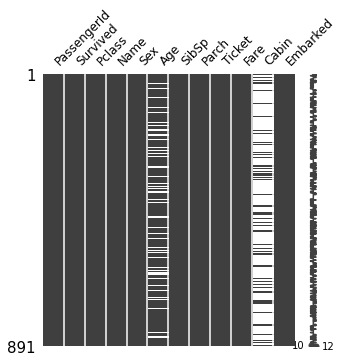

In [239]:
import missingno as msno

# Visualize missing values as a matrix
msno.matrix(df , figsize=(5,5), fontsize=12)

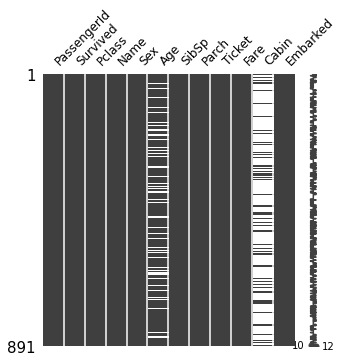

In [240]:
msno.matrix(df_drop_outliers , figsize=(5,5), fontsize=12)


This happens when all univariate outliers are removed for each variable. When you are working with a dataset like this, it would not be wise to remove the entire row or column with all these outliers/missing data.

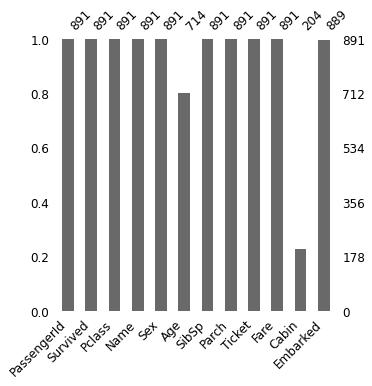

In [241]:
# Visualize the number of missing
# values as a bar chart
msno.bar(df_drop_outliers , figsize=(5,5), fontsize=12)

**2- Impute Outliers**


- There are several imputation techniques. One common technique used is Common Value Imputation like mean or median or mode.

- However, in doing so, we might under or overestimate it. In other words, we could be inducing biases in our dataset, which defeats the purpose of us treating outliers and missing data in the first place.

In [242]:
def impute_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   upper = df[~(df>(q3+1.5*IQR))].max()
   lower = df[~(df<(q1-1.5*IQR))].min()
   df = np.where(df > upper, df.mean(), np.where( df < lower, df.mean(),df))
   return df

df_impute = df.copy()
df_impute['Age'] = impute_outliers_IQR(df_impute['Age'])
print(df_impute.describe()['Age'])

print('*'*20)

df_impute = df.copy()
df_impute['Fare'] = impute_outliers_IQR(df_impute['Fare'])
print(df_impute.describe()['Fare'])



count    714.000000
mean      29.081737
std       13.622385
min        0.420000
25%       20.125000
50%       28.000000
75%       37.000000
max       64.000000
Name: Age, dtype: float64
********************
count    891.000000
mean      19.694510
std       13.556718
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max       65.000000
Name: Fare, dtype: float64


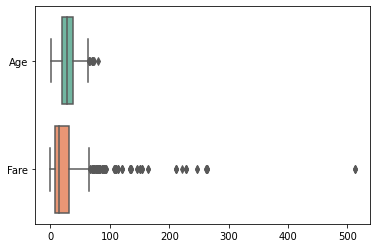

In [243]:
# Before impute_outliers_IQR
df_1 = df[['Age','Fare']]
ax = sns.boxplot(data=df_1, orient="h", palette="Set2")


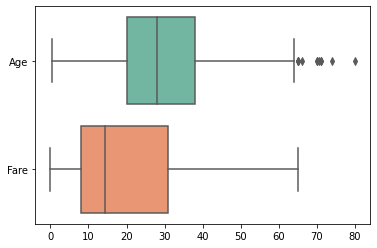

In [244]:
# After impute_outliers_IQR
df_2 = df_impute[['Age','Fare']]
ax = sns.boxplot(data=df_2, orient="h", palette="Set2")



**4- Winsorize/Cap outliers**

- Sometimes it’s best to keep outliers in your data. They can capture valuable information that is part of your study area. 

- Winsorization is essentially similar to imputing, but instead of imputing extreme values with mean, median, mode, min or max values, we imput those outliers with our chosen percentile.

* For example, 90% winsorization means the replacement of the top 5% and bottom 5% of the data. The top 5% of the data is replaced by the value of the data at the 95th percentile and the value of the bottom 5% of the data is replaced by the value of the data at the 5th percentile.


- This technique is used when you can assume that all outliers express the same behaviors or patterns, meaning the model wouldn’t learn anything new by allowing the outliers to remain. 

In [245]:
df.shape

(891, 12)

In [246]:
def Capping_outliers_usingMeanandSTD (df , feature):
  upper_limit = df[feature].mean() + 3*df[feature].std()
  lower_limit = df[feature].mean() - 3*df[feature].std()
   
  ## the basic syntax is as, np.where(condition, True, False) 
  ## if the condition is true, then that data point will be getting the upper limit value (within range) 
  ##if not, it will go to check the lower limit, and if that’s true, then it will give that data point lower limit value (within range).

  df[feature] = np.where( df[feature]>upper_limit, upper_limit, np.where(  df[feature]<lower_limit, lower_limit,df[feature] ))


df_Capping_outliers= df.copy()

Capping_outliers_usingMeanandSTD(df_Capping_outliers, 'Age')
Capping_outliers_usingMeanandSTD(df_Capping_outliers, 'Fare')


In [247]:
df_Capping_outliers.shape

(891, 12)

Inference: As we did capping, no data was lost, and we still have 891 rows

In [248]:
print(df['Age'].describe())
print(df_Capping_outliers['Age'].describe())
#??? no change

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64
count    714.000000
mean      29.688694
std       14.492933
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       73.278610
Name: Age, dtype: float64


 Now, if we compare the minimum and maximum values before outlier removal and after, we can see that the minimum value didnt change , as there was any outlier less than minumum , however the maximum value is decreased.
 Taking into consideration that the mean and std valuse didnt change as well.

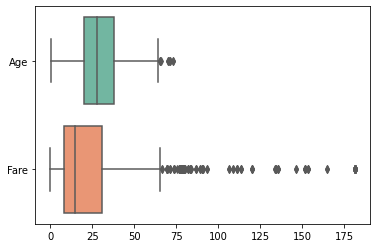

In [249]:
df_2 = df_Capping_outliers[['Age','Fare']]
ax = sns.boxplot(data=df_2, orient="h", palette="Set2")



# **Multivariate Outliers**

A multivariate outlier is an unusual combination of values in an observation across several variables. For example, it could be a human with a height measurement of 2 meters (in the 95th percentile) and weight measurement of 50kg (in the 5th percentile).



## **Visualize outliers**

A common way to plot multivariate outliers is the scatter plot. Keep in mind that visualizing multivariate outliers across more than two variables is not feasible in a 2D space. Therefore, we will stick to outliers found across two variables for visualization — so-called bi-variate outliers.

The scatterplot visualizes the relationship between two (numerical) variables. In a scatterplot, every observation is plotted as a point with two coordinates (X,Y) that represent two variables. Here, for example, X represents the value for variable 1 and Y the value for variable 2.




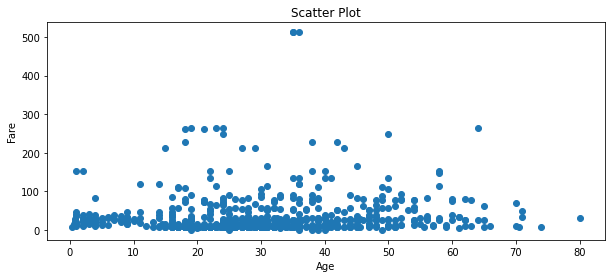

In [250]:
def scatter_plots(df1,df2):
    fig, ax = plt.subplots(figsize=(10,4))
    ax.scatter(df1,df2)
    ax.set_xlabel('Age')
    ax.set_ylabel('Fare')
    plt.title("Scatter Plot")
    plt.show()
scatter_plots(df['Age'],df['Fare'])

Finally, it is important to note that there are several other ways of detecting univariate and multivariate outliers. Other popular methods are k-nearest neighbours, DBSCAN, or isolation forests, just to name a few. There is no right or wrong method, but one might be more appropriate than another for your data set. When deciding on the outlier detection method you would like to use, I recommend basing your decision on the data’s distribution, sample size, and the number of dimensions.

**Resources**

- https://towardsdatascience.com/detecting-and-treating-outliers-in-python-part-1-4ece5098b755

- https://towardsdatascience.com/detecting-and-treating-outliers-in-python-part-2-3a3319ec2c33

- https://learn.365datascience.com/courses/learn-machine-learning-process-a-z/treating-outliers/
